In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Load dataset
housing = fetch_california_housing()
X = housing.data[:, [0]]  # Only MedInc feature
y = housing.target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Track train/test errors
train_errors = []
test_errors = []

# Loop through degrees 1 to 20
for degree in range(1, 21):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_errors.append(mean_squared_error(y_train, y_train_pred))
    test_errors.append(mean_squared_error(y_test, y_test_pred))
    
print("✅ All polynomial models (degrees 1 to 20) trained & evaluated.")


✅ All polynomial models (degrees 1 to 20) trained & evaluated.


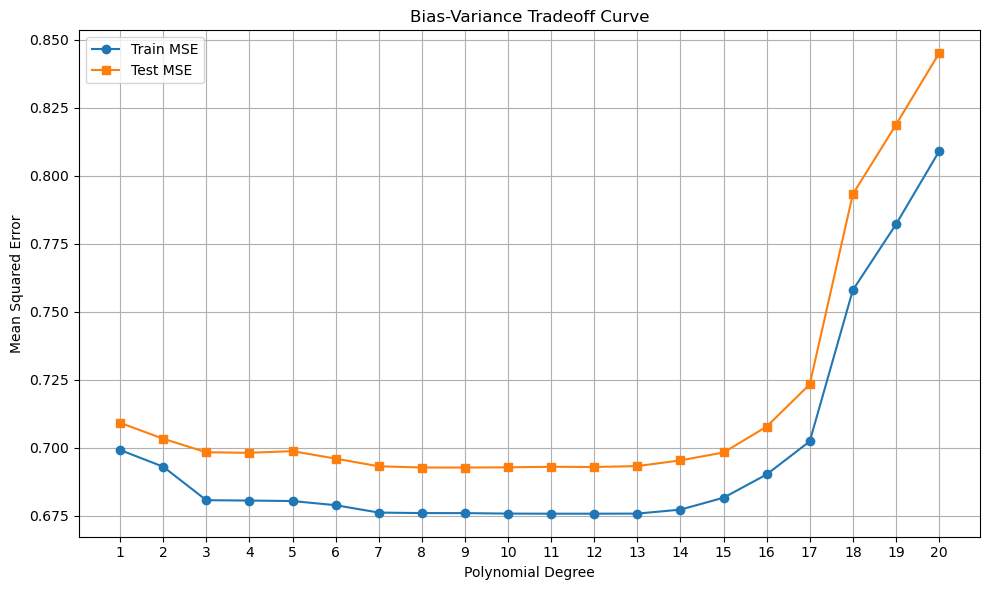

In [16]:
# Plot the train/test errors
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_errors, label="Train MSE", marker='o')
plt.plot(range(1, 21), test_errors, label="Test MSE", marker='s')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias-Variance Tradeoff Curve")
plt.legend()
plt.grid(True)
plt.xticks(range(1, 21))
plt.tight_layout()
plt.show()
